# Assignment 2 ([M4LP](https://osiris.uu.nl/osiris_student_uuprd/OnderwijsCatalogusSelect.do?selectie=cursus&collegejaar=2022&cursus=KI3V21001))

The assignment covers lexical semantics and reasoning.  
<font color="red">**The rules to follow**:</font>  
* Don't delete any initially provided cells, either text or code cells (but you should delete certain lines in the cells, continue reading).
* Don't delete the exercise code header `#...# EXERCISE n #..#` lines and the `# TEST` lines. 
* Don't change the names of provided functions and variables. 
* If you skip an exercise, then delete all lines in the cell following the header `#...# EXERCISE n #..#` but leave its backup part--the line with `IFSKIPPED` and its following lines.
* If you solve an exercise, then delete its corresponding backup part starting with `IFSKIPPED` and the following lines. 
* Use global vars throughout your code and change only those globals vars that are explicitly instructed. 
* For `#TEST` cells, if its output is coming from your code, then leave it; otherwise clear the output of the cell as it is uninformative and clutters the ipynb. 
* For Text cells, you are expected to insert your input only in the cells that come with a red section title. 
* Name the ipynb file with your group number, e.g., `01.ipynb` or `11.ipynb`.

<font color="red">You following these rules helps us to grade the submissions relatively efficiently. If these rules are violated, a submission will be subject to penalty points.</font>  

<font color="red">**IMPORTANT**</font>: you are strongly encouraged to use Google Colab when solving the exercises. Setting the common environment prevents students and teachers from various headaches related to cross-platform variations, module/package versioning, and unpredicted behaviour of the code. In this way, we try that you spend as much time as possible on coding during the course rather than on installations. Moreover, colab notebooks are very practical for group collaboration as they come with version history and several persons can work on the same notebook (not simultaneously though).  
You are still free to solve the exercises on your own machine but in the end, make sure that your solutions also work in the colab environment. 

by L.abzianidze@uu.nl

# <font color="red">Contributions</font>

~~Delete this text and write instead of it your:~~
* ~~group number (same as the file name, for sanity chack)~~
* ~~a list of group members names (NOT student IDs)~~
* ~~who contributed to which exercises (you don't need to be very detailed)~~ 

# Installation

In [ ]:
import spacy
if spacy.__version__ != '3.5.2':
    print(f"spaCy v={spacy.__version__} but it should be 3.5.2\nForce install 3.5.2 with the next cell")

In [ ]:
# may require environment restart
# !pip install spacy==3.5.2

In [ ]:
# may require environment restart
!python -m spacy download en_core_web_md

2023-05-18 07:43:35.782259: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 17.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [2]:
# assigntools package is a course specific collection of useful tools 
!rm -fr assigntools # helps to rerun this cell witthout errors, if recloning needed 
! git clone https://github.com/kovvalsky/assigntools.git

Cloning into 'assigntools'...
remote: Enumerating objects: 228, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 228 (delta 10), reused 0 (delta 0), pack-reused 200
Receiving objects: 100% (228/228), 55.48 KiB | 1.73 MiB/s, done.
Resolving deltas: 100% (112/112), done.


In [ ]:
import nltk
import sys
from nltk.corpus import wordnet as wn
nltk.download('wordnet')
nltk.download('omw-1.4')
import spacy
# Course-specific package
from assigntools.M4LP.A1 import read_pickle, write_pickle
from assigntools.M4LP.A2 import evaluate_contextual_lex_rel, taged2offsets, show_tableau, LangPro

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
# TEST
print(f"spaCy version: {spacy.__version__}")
print(f"Python version: {sys.version}")
print(f"NLTK version: {nltk.__version__}")

spaCy version: 3.5.2
Python version: 3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]
NLTK version: 3.8.1


# User modules

Import all modules here what you might need in addition to what is already imported.

In [ ]:
# IMPORT ALL ADDED AND NECESSARY MODULES HERE (IF ANY)
import spacy
!python -m spacy download en_core_web_md

# assigntools package is a course specific collection of useful tools 
!rm -fr assigntools # helps to rerun this cell witthout errors, if recloning needed 
! git clone https://github.com/kovvalsky/assigntools.git

import nltk
import sys
from nltk.corpus import wordnet as wn
nltk.download('wordnet')
nltk.download('omw-1.4')
import spacy
# Course-specific package
from assigntools.M4LP.A1 import read_pickle, write_pickle
from assigntools.M4LP.A2 import evaluate_contextual_lex_rel, taged2offsets, show_tableau, LangPro

2023-05-18 07:44:21.158881: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 17.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
Cloning into 'assigntools'...
remote: Enumerating objects: 228, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 228 (delta 10), reused 0 (delta 0), pack-reused 200
Receiving objects: 100% (228/228), 55.48 KiB | 4.27 MiB/s, done.
Resolving deltas: 100% (112/112), done.


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


# WordNet

The code shows how to get the noun(!) sysnsets for `lecture` and for each sysnset to show its definition and examples and to list its word senses. This code attempts to show how to get all the info what is displayed in the [online results](http://wordnetweb.princeton.edu/perl/webwn?s=lecture&sub=Search+WordNet&o2=&o0=1&o8=1&o1=1&o7=1&o5=&o9=&o6=&o3=&o4=&h=00000).
More details about `wn.Synset` and `wn.Lemma` classes can be found [here](https://www.nltk.org/_modules/nltk/corpus/reader/wordnet.html) and [here](https://www.nltk.org/howto/wordnet.html).  
<font color="red">It is important that you understand this code well as it will help you with other WordNet exercises</font>.  
Note that NLTK uses WordNet 3.0 while the online browser 3.1. So, if there are some mismatches between these two, one of the reasons can be different versions.  
If you prefer more graphical visualization of wordnet, check [visuwords](https://visuwords.com/). Warning: it might get pretty messy when large synsets are explored.  
Definitions of certain technical terms of WordNet can be looked up [here](https://wordnet.princeton.edu/documentation/wngloss7wn).

In [ ]:
for synset in wn.synsets('lecture', pos=wn.NOUN):
    all_examples = ','.join([ f'"{e}"' for e in synset.examples() ])
    print(f'{synset}:\n\t({synset.definition()})\n\t{all_examples}')
    # for l in synset.lemmas():
    #     # find a sense number of the lemma of the target synset.
    #     # For this, first, we find all synsets for this lemma and 
    #     # in this synset list we find the position+1 of the target synset 
    #     all_synsets_of_l = wn.synsets(l.name())
    #     sense_num = all_synsets_of_l.index(l.synset()) + 1
    #     print(f"\t{l.name()}#{sense_num}")

Synset('lecture.n.01'):
	(a speech that is open to the public)
	"he attended a lecture on telecommunications"
Synset('lecture.n.02'):
	(a lengthy rebuke)
	"a good lecture was my father's idea of discipline","the teacher gave him a talking to"
Synset('lecture.n.03'):
	(teaching by giving a discourse on some subject (typically to a class))
	


# Contextual lexical relation

We will be working with the `context_ppdb` dataset from [Shwartz et al (2016)](https://aclanthology.org/S16-2013/). The examples from the dataset can be found in Table 1 of the paper and in the dataset itself. It is also recommended to read `README.txt` found in the dataset archive. We will use `dataset.tsv` file for the exercise (as we are not doing any model training).

In a nutshell, the task is to guess a lexical relation that holds between the senses of `x` and `y` that they have in their corresponding contexts. We will divide the task into two tasks. First will be the word sense disambiguation (WSD) for `x/y` in their contexts, and the second will be to predict a lexical relation between the word senses based on WordNet.

In [ ]:
# Downloading the context_ppdb dataset
!wget https://naturallogic.pro/_files_/download/context_ppdb_fine_human_precise.zip
!unzip -o context_ppdb_fine_human_precise.zip -d context_ppdb

--2023-05-17 08:34:12--  https://naturallogic.pro/_files_/download/context_ppdb_fine_human_precise.zip
Resolving naturallogic.pro (naturallogic.pro)... 85.214.116.22
Connecting to naturallogic.pro (naturallogic.pro)|85.214.116.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1029651 (1006K) [application/zip]
Saving to: ‘context_ppdb_fine_human_precise.zip’

context_ppdb_fine_h 100%[===================>]   1006K  1.35MB/s    in 0.7s    

2023-05-17 08:34:13 (1.35 MB/s) - ‘context_ppdb_fine_human_precise.zip’ saved [1029651/1029651]

Archive:  context_ppdb_fine_human_precise.zip
  inflating: context_ppdb/README.txt  
  inflating: context_ppdb/test.tsv   
  inflating: context_ppdb/train.tsv  
  inflating: context_ppdb/validation.tsv  
  inflating: context_ppdb/dataset.tsv  


In [ ]:
# viewing top 10 lines of the dataset
!head context_ppdb/dataset.tsv

bicycle	riding	Bolotta recounted finding 22 sharpened <x>bicycle</x> spokes jabbed into the lawn while she was out with the lawn mower.	A lesser known work of Hopper's, 'Bridal Path' shows a horseback <y>riding</y> path in Central Park.	other-related	0.6
photo	picture	Some of the mission will include examining the surface for sources of water, and taking comparison <x>photos</x> of the light side and dark sides of the surface.	The trial judge, His Honour Judge Michael Murphy QC, who had previously ordered the jury not to consult the Internet, did not halt the prosecution as he felt 'satisfied' the jury hadn't seen the <y>picture</y>.	equivalence	1.0
catch	fish	Department officer Chris Mitchell says the fishermen had traversed 200 miles of Commonwealth waters and were inside the three nautical mile state limit when they were <x>caught</x>.	A 375 million-year old fossilised umbilical cord indicates that placoderm, thought to be ancestors of modern <y>fish</y>, are actually closer to shar

## Ex1[2pt]: Reading data

Write `read_data` function to read data from the file. Before reading the data from the file, understand the content & format of the file. 
It is not a good practice when the original texts are changed, like in this dataset, where tags `<x>` and `<y>` are used to mark occurences of target words. Because of this, we first need to clean the texts from the tags but save the character offsets of the tagged tokens (to avoid information loss). The cleaned sentences will later be used as an input to spaCy.  
To help you with replacing tagged word info with character offsets, we provide you a ready function [tagged2offsets](https://github.com/kovvalsky/assigntools/blob/main/M4LP/A2.py) that does this (it was imported in the beginning). 

In [ ]:
#TEST: a real example from the dataset
s = "Studies have shown that <x>drinks</x>, especially sweetened, contribute to obesity among adults and children, leading to diseases like diabetes. 'Eight out of ten <x>drinks</x> sold in California public schools are sports <x>drinks</x>,' Padilla said, citing information from the California Department of Public Health."
cleaned_s, offsets = taged2offsets("x", s)
print(cleaned_s)
for start, end in offsets:
    print(f"{cleaned_s[start:end]} at {start}:{end}")

Studies have shown that drinks, especially sweetened, contribute to obesity among adults and children, leading to diseases like diabetes. 'Eight out of ten drinks sold in California public schools are sports drinks,' Padilla said, citing information from the California Department of Public Health.
drinks at 24:30
drinks at 156:162
drinks at 208:214




```
Studies have shown that drinks, especially sweetened, contribute to obesity among adults and children, leading to diseases like diabetes. 'Eight out of ten drinks sold in California public schools are sports drinks,' Padilla said, citing information from the California Department of Public Health.
drinks at 24:30
drinks at 156:162
drinks at 208:214
```



In [ ]:
################################################################################
################################## EXERCISE 1 ##################################
################################################################################

def read_data(file_path):
    """ Read the samples from the data file.
        Return a list of samples, where each list element is a dictionary
        {'x':(x, tag_free_context_x, offsets_x), 'y':(y, tag_free_context_y, offsets_y), 
         'r':semantic_relation, 'c':confidence }.
        x and y are target words for left and right contexts while 
        tag_free_context_* are corresponding context sentences without <x/y> tags.
        offsets_x/y give positions of tagged words in the tag_free_context_x/y  
    """
    with open(file_path) as file:
      lijst = []
      for line in file:
        lsplit = line.split('\t')

        tag_free_context_x, offsets_x = taged2offsets("x", lsplit[2])
        tag_free_context_y, offsets_y = taged2offsets("y", lsplit[3])

        lijst.append({'x':(lsplit[0], tag_free_context_x, offsets_x), 'y':(lsplit[1], tag_free_context_y, offsets_y), 
                      'r':lsplit[4], 'c':lsplit[5].strip()})
    return lijst

In [ ]:
data = read_data('context_ppdb/dataset.tsv')

In [ ]:
#TEST EX1: compare(!) this output to the corresponding lines in the data file
# in order to better understand what kind of (weird) samples the data contains
print(data[0])
print(data[667])
print(data[766])
print(data[3338])
print(f"The data size = {len(data)}")

{'x': ('bicycle', 'Bolotta recounted finding 22 sharpened bicycle spokes jabbed into the lawn while she was out with the lawn mower.', [(39, 46)]), 'y': ('riding', "A lesser known work of Hopper's, 'Bridal Path' shows a horseback riding path in Central Park.", [(65, 71)]), 'r': 'other-related', 'c': '0.6'}
{'x': ('girl', 'One girl is still missing.', [(4, 8)]), 'y': ('woman', "Activists have sought women's right to vote in Saudi Arabia for years.", [(22, 27)]), 'r': 'other-related', 'c': '0.6'}
{'x': ('family', 'Father Yus Mawengkang, a Catholic priest in Papua, said the family had been transported to the island on fishing boats and hoped that they would be collected by Australian authorities.', [(60, 66)]), 'y': ('child', 'He is survived by three children, along with grandchildren and great-grandchildren.', [(24, 32), (50, 58), (74, 82)]), 'r': 'other-related', 'c': '0.8'}
{'x': ('goal', 'Scientific goals.', [(11, 16)]), 'y': ('soccer', "Fans of the Netherlands' soccer team were wildl



```
{'x': ('bicycle', 'Bolotta recounted finding 22 sharpened bicycle spokes jabbed into the lawn while she was out with the lawn mower.', [(39, 46)]), 'y': ('riding', "A lesser known work of Hopper's, 'Bridal Path' shows a horseback riding path in Central Park.", [(65, 71)]), 'r': 'other-related', 'c': '0.6'}
{'x': ('girl', 'One girl is still missing.', [(4, 8)]), 'y': ('woman', "Activists have sought women's right to vote in Saudi Arabia for years.", [(22, 27)]), 'r': 'other-related', 'c': '0.6'}
{'x': ('family', 'Father Yus Mawengkang, a Catholic priest in Papua, said the family had been transported to the island on fishing boats and hoped that they would be collected by Australian authorities.', [(60, 66)]), 'y': ('child', 'He is survived by three children, along with grandchildren and great-grandchildren.', [(24, 32), (50, 58), (74, 82)]), 'r': 'other-related', 'c': '0.8'}
{'x': ('goal', 'Scientific goals.', [(11, 16)]), 'y': ('soccer', "Fans of the Netherlands' soccer team were wildly celebrating too.", [(25, 31)]), 'r': 'independent', 'c': '0.8'}
The data size = 3404
```



0.5276145710928319

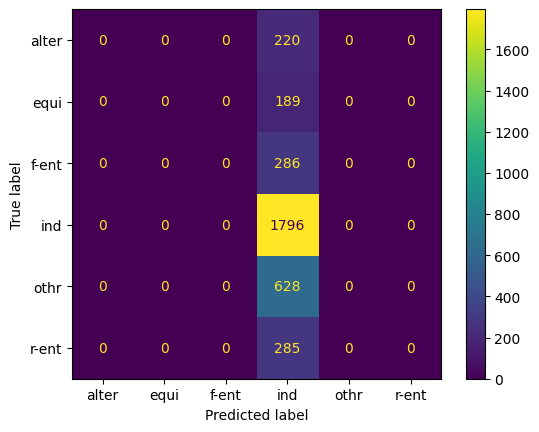

In [ ]:
#TEST: we also provide you with a function that evaluates predicted relations
# wrt the gold relations in data. Let's see if one always predicts 'independent'
# relation, what will be its accuracy and confusion matrix wrt the gold relations
evaluate_contextual_lex_rel(['independent']*len(data), data, draw=True)
# Note that 'independent' is the majority class baseline 

## Ex2[4pt]: Processing with spaCy

In order to guess the sense of a word in a context, it is helpful to know its POS tag. To find out the POS tags, we process context sentences with spaCy. To make processing faster, you can use `.pipe()` method (see Assignmnet 1) to parse all sentences in a single run.  
Note that we use `en_core_web_md` as it is the smallest model that comes with word vectors (and we will use them in latter exercises). 

In [ ]:
################################################################################
################################## EXERCISE 2 ##################################
################################################################################

def spacy_process(data):
    """ Takes the data variable as an input and processes the sentences with spacy.
        Returns a list of samples, where each sample is a dictionary
        {'x': (pos_x, doc_x), 'y': (pos_y, doc_y)}, where pos and doc are
        spaCy's pos tag (token.pos_) for a corresponging target word and 
        Doc object of the corresponding sentecne. 
        Sometimes target words have several occurences in a sentence 
        that might get different pos tags. In this case, for the sake of determinism,
        pick the first from the alphabetical order, e.g., ADJ is prefered over NOUN.
        The list order follows the order of samples in the data  
    """
    nlp = spacy.load("en_core_web_md")
    lijst = []
    x_clean = []
    y_clean = []

    for line in data:
      x_clean.append(line['x'][1])
      y_clean.append(line['y'][1])

    doc_x_lijst = list(nlp.pipe(x_clean))
    doc_y_lijst = list(nlp.pipe(y_clean))

    i = 0
    for line in data:
      pos_x_lijst = []
      pos_y_lijst = []
      char_spans_x = line['x'][2]
      char_spans_y = line['y'][2]

      doc_x = doc_x_lijst[i]
      for start_char, end_char in char_spans_x:
          word_span = doc_x.char_span(start_char, end_char)
          if word_span is not None:
              word_tokens = [token for token in doc_x if token.idx >= start_char and token.idx < end_char]
              pos_tags_for_word = [token.pos_ for token in word_tokens]
              pos_x_lijst.append(pos_tags_for_word)

      doc_y = doc_y_lijst[i]
      for start_char, end_char in char_spans_y:
          word_span = doc_y.char_span(start_char, end_char)
          if word_span is not None:
              word_tokens = [token for token in doc_y if token.idx >= start_char and token.idx < end_char]
              pos_tags_for_word = [token.pos_ for token in word_tokens]
              pos_y_lijst.append(pos_tags_for_word)

      i = i + 1
      lijst.append({'x': (sorted(pos_x_lijst)[0][0], doc_x), 'y': (sorted(pos_y_lijst)[0][0], doc_y)})

    return lijst

In [ ]:
#TEST
data[0]

{'x': ('bicycle',
  'Bolotta recounted finding 22 sharpened bicycle spokes jabbed into the lawn while she was out with the lawn mower.',
  [(39, 46)]),
 'y': ('riding',
  "A lesser known work of Hopper's, 'Bridal Path' shows a horseback riding path in Central Park.",
  [(65, 71)]),
 'r': 'other-related',
 'c': '0.6'}



```
{'x': ('bicycle',
  'Bolotta recounted finding 22 sharpened bicycle spokes jabbed into the lawn while she was out with the lawn mower.',
  [(39, 46)]),
 'y': ('riding',
  "A lesser known work of Hopper's, 'Bridal Path' shows a horseback riding path in Central Park.",
  [(65, 71)]),
 'r': 'other-related',
 'c': '0.6'}
```



In [ ]:
# takes ~40 sec with .pipe()
docs_data = spacy_process(data)

In [ ]:
#TEST
print(data[766]['y'])
print(docs_data[766]['y'])
print(f"{'-':-^20}")
print(data[3068]['x'])
print(docs_data[3068]['x'])
print(f"{'-':-^20}")
print(data[3338]['x'])
print(docs_data[3338]['x'])

('child', 'He is survived by three children, along with grandchildren and great-grandchildren.', [(24, 32), (50, 58), (74, 82)])
('NOUN', He is survived by three children, along with grandchildren and great-grandchildren.)
--------------------
('front', "Several officers in white forensic suits were examining the barricaded area and a huge white tent was erected in front of the house's front door.", [(113, 118), (134, 139)])
('ADJ', Several officers in white forensic suits were examining the barricaded area and a huge white tent was erected in front of the house's front door.)
--------------------
('goal', 'Scientific goals.', [(11, 16)])
('NOUN', Scientific goals.)




```
('child', 'He is survived by three children, along with grandchildren and great-grandchildren.', [(24, 32), (50, 58), (74, 82)])
('NOUN', He is survived by three children, along with grandchildren and great-grandchildren.)
--------------------
('front', "Several officers in white forensic suits were examining the barricaded area and a huge white tent was erected in front of the house's front door.", [(113, 118), (134, 139)])
('ADJ', Several officers in white forensic suits were examining the barricaded area and a huge white tent was erected in front of the house's front door.)
--------------------
('goal', 'Scientific goals.', [(11, 16)])
('NOUN', Scientific goals.)
```



In [ ]:
#TEST EX2 
#checking what is the counts of pos tags assigned by spaCy en_core_web_md(!) to the target words 
from collections import Counter

word_pos_cnt = Counter(s[i][0] for s in docs_data for i in 'xy' )
print(word_pos_cnt)
print(f"{sum(word_pos_cnt.values())} pos tagged words show that we have tags for all target words")

Counter({'NOUN': 4921, 'VERB': 946, 'PROPN': 765, 'ADJ': 174, 'INTJ': 2})
6808 pos tagged words show that we have tags for all target words




```
Counter({'NOUN': 4921, 'VERB': 946, 'PROPN': 765, 'ADJ': 174, 'INTJ': 2})
6808 pos tagged words show that we have tags for all target words
```



## WSD

After we have processed context sentences, we have POS tags for the target words. This will help us to narrow down the search space of word senses. Now it is time to do Word Sense Disambiguation (WSD) for each word in its context sentence. You are supposed to write three functions that predict WordNet sense for each word in the context for the entire data. Each of these functions take `data` and `docs_data` and returns a list of dictionaries with synsets of `x` and `y` words. The functions will differ the way they predict senses. 


* `most_frequent_sense()` - picks the first sense of the word, which is also the most frequent sense of the word.pos (i.e., word.pos.01).
* `simple_lesk_sense()` - picks the sense whose description and/or examples has largest overlap with the context sentence.
* `vector_lesk_sesne()` - picks the sense whose description and/or examples vector is most similar to the vector of the context sentence.

<font color="red">IMPORTANT</font>: WordNet covers the words belonging to four classes (noun, verb, adjective, and adverb). In case spaCy assigned a POS tag that is none of these four, the wsd functions should be able to have some fallback pos tag in such cases to avoid runtime errors. Noun is a good option for such a fallback pos tag. For example, if a word gets proper name POS tag, a wsd can assume that its tag is Noun.

Note that whether the WordNet description and examples are used alone or together, it is up to you. If you want to have a relativelyt high-performing system in the end, you might want to explore different settings.  

Potentially useful links: [link1](https://github.com/Akirato/Lesk-Algorithm/blob/master/leskAlgorithm.py), [link2](https://medium.com/analytics-vidhya/comparative-word-sense-disambiguation-1c3f0f4be1fa), [link3](https://www.nltk.org/howto/wsd.html)



## Ex3[3pt]: Most frequent sense

In [ ]:
################################################################################
################################## EXERCISE 3 ##################################
################################################################################

def most_frequent_sense(data, docs_data):
    """ Takes data and docs_data, and return a list of dictionaries
        {'x': synset_of_x, 'y': synset_of_y } where synset_of_x/y is 
        the first sense of x/y in the context_x/y.
        Note that pos tag of x/y is retrieved from docs_data and used
        to restric the possible senses for a word.
        If synset_of_x/y cannot be found (e.g., x/y is an unknown word), 
        return None for the corresponding x/y key.
        The order in the returned list follows the orders in data and docs_data.
    """
    wordx, wordy, posx, posy, lijst = [], [], [], [], []

    for line in data:
      wordx.append(line['x'][0])
      wordy.append(line['y'][0])

    for line in docs_data:
      xpos = line['x'][0]
      if xpos == 'NOUN':
        posx.append('n')
      elif xpos == 'VERB':
        posx.append('v')
      elif xpos == 'ADJ':
        posx.append('a')
      else:
        posx.append('n')
    
      ypos = line['y'][0]
      if ypos == 'NOUN':
        posy.append('n')
      elif ypos == 'VERB':
        posy.append('v')
      elif ypos == 'ADJ':
        posy.append('a')
      else:
        posy.append('n')

    for i in range(len(wordx)):
      synsetsx = [(s, s.pos()) for s in wn.synsets(wordx[i])]
      synsetx = None
      for synset in synsetsx:
        if synset[1] == posx[i]:
          synsetx = synset[0]
          break
      
      synsetsy = [(s, s.pos()) for s in wn.synsets(wordy[i])]
      synsety = None
      for synset in synsetsy:
        if synset[1] == posy[i]:
          synsety = synset[0]
          break
      
      
      lijst.append({'x': synsetx, 'y': synsety})
    return lijst

In [ ]:
MFS_data = most_frequent_sense(data, docs_data)

In [ ]:
#TEST EX3: note that in this output, "sit" in 628_x is identifiet as Noun but
# WordNet doesn't have noun sense of "sit", hence the synset is None
for i in [628, 766, 3338]:
    for xy in 'xy':
        print(data[i][xy][:2])
        print(docs_data[i][xy])
        print(MFS_data[i][xy])
    print(f"{'':-^20}")

('sit', 'In West Bengal, the ruling Left Front organised sit-ins before the offices of oil PSUs.')
('NOUN', In West Bengal, the ruling Left Front organised sit-ins before the offices of oil PSUs.)
None
('stand', 'It was worth my while to try to stand up and punch with him.')
('VERB', It was worth my while to try to stand up and punch with him.)
Synset('stand.v.01')
--------------------
('family', 'Father Yus Mawengkang, a Catholic priest in Papua, said the family had been transported to the island on fishing boats and hoped that they would be collected by Australian authorities.')
('NOUN', Father Yus Mawengkang, a Catholic priest in Papua, said the family had been transported to the island on fishing boats and hoped that they would be collected by Australian authorities.)
Synset('family.n.01')
('child', 'He is survived by three children, along with grandchildren and great-grandchildren.')
('NOUN', He is survived by three children, along with grandchildren and great-grandchildren.)
Syns



```
('sit', 'In West Bengal, the ruling Left Front organised sit-ins before the offices of oil PSUs.')
('NOUN', In West Bengal, the ruling Left Front organised sit-ins before the offices of oil PSUs.)
None
('stand', 'It was worth my while to try to stand up and punch with him.')
('VERB', It was worth my while to try to stand up and punch with him.)
Synset('stand.v.01')
--------------------
('family', 'Father Yus Mawengkang, a Catholic priest in Papua, said the family had been transported to the island on fishing boats and hoped that they would be collected by Australian authorities.')
('NOUN', Father Yus Mawengkang, a Catholic priest in Papua, said the family had been transported to the island on fishing boats and hoped that they would be collected by Australian authorities.)
Synset('family.n.01')
('child', 'He is survived by three children, along with grandchildren and great-grandchildren.')
('NOUN', He is survived by three children, along with grandchildren and great-grandchildren.)
Synset('child.n.01')
--------------------
('goal', 'Scientific goals.')
('NOUN', Scientific goals.)
Synset('goal.n.01')
('soccer', "Fans of the Netherlands' soccer team were wildly celebrating too.")
('NOUN', Fans of the Netherlands' soccer team were wildly celebrating too.)
Synset('soccer.n.01')
--------------------
```



## Ex4[3pt]: Simple Lesk

Simplest is to use [NLTK's Lesk](https://www.nltk.org/howto/wsd.html). You can read more about Lesk Algorithm [here](https://en.wikipedia.org/wiki/Lesk_algorithm). You are also welcome to write your own Lesk version as NLTK's one is not performing well.

In [ ]:
################################################################################
################################## EXERCISE 4 ##################################
################################################################################
from nltk.wsd import lesk

def simple_lesk_sense(data, docs_data):
    """ Takes data and docs_data, and return a list of dictionaries
        {'x': synset_of_x, 'y': synset_of_y } where synset_of_x/y is 
        the sense of x/y in the context_x/y detecting by Lesk-like algorithm,
        which selects a sense based on the size of the overlap between the
        context and the definition and/or examples of the possible synsets.
        Note that pos tag of x/y is retrieved from docs_data and used
        to restric the possible senses for a word.
        The order in the returned list follows the orders in data and docs_data.
    """
    lijst = []
    posx = []
    posy = []

    for line in docs_data:
      xpos = line['x'][0]
      if xpos == 'NOUN':
        posx.append('n')
      elif xpos == 'VERB':
        posx.append('v')
      elif xpos == 'ADJ':
        posx.append('a')
      else:
        posx.append('n')
    
      ypos = line['y'][0]
      if ypos == 'NOUN':
        posy.append('n')
      elif ypos == 'VERB':
        posy.append('v')
      elif ypos == 'ADJ':
        posy.append('a')
      else:
        posy.append('n') 

    i = 0
    for line in data:
      lijst.append({'x': lesk((line['x'][1].split()), (line['x'][0]), posx[i]), 'y': lesk((line['y'][1].split()), (line['y'][0]), posy[i])})
      i = i + 1
      
    return lijst

In [ ]:
SIMPLE_LESK_data = simple_lesk_sense(data, docs_data)

In [ ]:
#TEST EX4
# These are the same data samples as the ones above.
# compare sense predictions from this to the previous function(s) and find the difference
# IMPORTANT: depending on certain choice points, you might not get exactly the same
# output as below and that's fine. 
for i in [628, 766, 3338]:
    for xy in 'xy':
        print(data[i][xy][:2])
        print(docs_data[i][xy])
        print(SIMPLE_LESK_data[i][xy])
    print(f"{'':-^20}")

('sit', 'In West Bengal, the ruling Left Front organised sit-ins before the offices of oil PSUs.')
('NOUN', In West Bengal, the ruling Left Front organised sit-ins before the offices of oil PSUs.)
None
('stand', 'It was worth my while to try to stand up and punch with him.')
('VERB', It was worth my while to try to stand up and punch with him.)
Synset('digest.v.03')
--------------------
('family', 'Father Yus Mawengkang, a Catholic priest in Papua, said the family had been transported to the island on fishing boats and hoped that they would be collected by Australian authorities.')
('NOUN', Father Yus Mawengkang, a Catholic priest in Papua, said the family had been transported to the island on fishing boats and hoped that they would be collected by Australian authorities.)
Synset('syndicate.n.01')
('child', 'He is survived by three children, along with grandchildren and great-grandchildren.')
('NOUN', He is survived by three children, along with grandchildren and great-grandchildren.)




```
('sit', 'In West Bengal, the ruling Left Front organised sit-ins before the offices of oil PSUs.')
('NOUN', In West Bengal, the ruling Left Front organised sit-ins before the offices of oil PSUs.)
None
('stand', 'It was worth my while to try to stand up and punch with him.')
('VERB', It was worth my while to try to stand up and punch with him.)
Synset('digest.v.03')
--------------------
('family', 'Father Yus Mawengkang, a Catholic priest in Papua, said the family had been transported to the island on fishing boats and hoped that they would be collected by Australian authorities.')
('NOUN', Father Yus Mawengkang, a Catholic priest in Papua, said the family had been transported to the island on fishing boats and hoped that they would be collected by Australian authorities.)
Synset('syndicate.n.01')
('child', 'He is survived by three children, along with grandchildren and great-grandchildren.')
('NOUN', He is survived by three children, along with grandchildren and great-grandchildren.)
Synset('child.n.04')
--------------------
('goal', 'Scientific goals.')
('NOUN', Scientific goals.)
Synset('goal.n.04')
('soccer', "Fans of the Netherlands' soccer team were wildly celebrating too.")
('NOUN', Fans of the Netherlands' soccer team were wildly celebrating too.)
Synset('soccer.n.01')
--------------------
```



## Ex5[6pt]: Vector-based Lesk

The simple Lesk algorith uses the size of the word overlap between the context and the synset gloss to predict the synset. Here we ask you to use vector (cosine) similarity instead of the size of overlap. In sapCy is very simple to check vector similarity between two spaCy's tokens/spans/docs. But this also means that we need to process glosses of relevant synsets with spaCy.  
To make things relatively efficient, you can first extract all possibel glosses of target words of the data and process them with a singel `.pipe()` run of spaCy. It is up to you what will be gloss of teh synset, only examples, definitions, or both. Note that you can give several sentences as a singel string for processing to spaCy.  

After processing all relevant glosses, one needs to keep processed glosses related to their corresponding synsets. With the help of this, then you can easily retrieve processed glosses when checking similarity to the context of a target word. 

Read about Vector similarity in spaCy in [sec. 8](https://course.spacy.io/en/chapter2). More about the spaCy's vectors can be found [here](https://spacy.io/api/vectors).

In [ ]:
################################################################################
################################## EXERCISE 5 ##################################
################################################################################

def vector_lesk_sense(data, docs_data):
    """ Takes data and docs_data, and return a list of dictionaries
        {'x': synset_of_x, 'y': synset_of_y } where synset_of_x/y is 
        the sense of x/y in the context_x/y detecting by Lesk-like algorithm,
        which selects a sense based on the size of the overlap between the
        context and the definition and/or examples of the possible synsets.
        Note that pos tag of x/y is retrieved from docs_data and used
        to restric the possible senses for a word.
        The order in the returned list follows the orders in data and docs_data.
    """

    nlp = spacy.load("en_core_web_md")

    lijst = []
    wordx = []
    wordy = []
    posx = []
    posy = []

    synset_of_x = []
    synset_of_y = []

    for line in data:
      wordx.append(line['x'][0])
      wordy.append(line['y'][0])

    for line in docs_data:
      xpos = line['x'][0]
      if xpos == 'NOUN':
        posx.append('n')
      elif xpos == 'VERB':
        posx.append('v')
      elif xpos == 'ADJ':
        posx.append('a')
      else:
        posx.append('n')
    
      ypos = line['y'][0]
      if ypos == 'NOUN':
        posy.append('n')
      elif ypos == 'VERB':
        posy.append('v')
      elif ypos == 'ADJ':
        posy.append('a')
      else:
        posy.append('n') 

    ####### process the synset definitions with the model (takes ~1m) ################
    synset_x_defs = []
    for i in range(len(wordx)):
      glossesstring = ""
      for synset in wn.synsets(wordx[i], pos=posx[i]):
        glossesstring += f" {synset.definition()}."
      synset_x_defs.append(glossesstring[1:])

    synset_y_defs = []
    for i in range(len(wordy)):
      glossesstring = ""
      for synset in wn.synsets(wordy[i], pos=posy[i]):
        glossesstring += f" {synset.definition()}."
      synset_y_defs.append(glossesstring[1:])

    
    doc_x_def = list(nlp.pipe(synset_x_defs))
    doc_y_def = list(nlp.pipe(synset_y_defs))
    
    #################################### get the highest scoring synset for x ########################################################

    i = 0
    for line in data:
      synsets = []
      # if the target word has no synsets, the best synset is None
      if wn.synsets(wordx[i], pos=posx[i]) == []:
        synset_of_x.append(None)
        i += 1
        continue

      # if the target word has 1 synset, the best synset is that synset
      elif len(wn.synsets(wordx[i], pos=posx[i])) == 1:
        synset_of_x.append(wn.synsets(wordx[i], pos=posx[i])[0])
        i += 1
        continue

      # if the target word has more than 1 synset, the best synset is the one with the highest similarity to the sentence
      else:
        for synset in wn.synsets(wordx[i], pos=posx[i]):
          synsets.append(synset)

      similarities = []
      doc_x_glosses = doc_x_def[i]
      synset_def = []
      sim_def = []
      j = 0

      tempgloss = None
      for gloss in doc_x_glosses.sents:
        # if the gloss does not end with a '.' then add the next gloss (this is because the .sents method also splits the sentence on ')' and in at least 1 case that was a problem)
        if gloss.text.split()[-1][-1] != '.':
          tempgloss = gloss
          continue
        #if tempgloss is not empty add the tempgloss to the current gloss to form 1 sentence again.
        if tempgloss != None:
          gloss = spacy.tokens.Span(tempgloss.doc, tempgloss.start, gloss.end, label=tempgloss.label)

        # synset_def = [(a synset of word, their gloss)]
        synset_def.append((synsets[j], gloss))
        
        # if the similarity is empty then it has no best synset
        if gloss.similarity(nlp(line['x'][1])) == []:
            sim_def.append(None, gloss)
        # else add (similarity score, that gloss) to sim_def list
        else:
          sim_def.append((gloss.similarity(nlp(line['x'][1])), gloss))
        
        # empty tempgloss
        tempgloss = None

        j += 1

      # get the highest similarity and their gloss
      highscore = (0, '')
      for sim in sim_def:
        if sim[0] > highscore[0]:
          highscore = sim

      for synset in synset_def:
        # if there was no highscore (or the similarity was negative(which did occur sometimes)) then get the simple lesk data of that word
        if highscore[0] == 0:
          synset_of_x.append(SIMPLE_LESK_data[i]['x'])
          break

        # else get the highest scoring synset
        else:
          if highscore[1] == synset[1]:
            synset_of_x.append(synset[0])

      i += 1

    ####################################### get the highest scoring synset for y ############################################################

    i = 0
    for line in data:
      if (i % 100) == 0:
        print(i)

      synsets = []
      # if the target word has no synsets, the best synset is None
      if wn.synsets(wordy[i], pos=posy[i]) == []:
        synset_of_y.append(None)
        i += 1
        continue

      # if the target word has 1 synset, the best synset is that synset
      elif len(wn.synsets(wordy[i], pos=posy[i])) == 1:
        synset_of_y.append(wn.synsets(wordy[i], pos=posy[i])[0])
        i += 1
        continue

      # if the target word has more than 1 synset, the best synset is the one with the highest similarity to the sentence
      else:
        for synset in wn.synsets(wordy[i], pos=posy[i]):
          synsets.append(synset)

      similarities = []
      doc_y_glosses = doc_y_def[i]

      synset_def = []
      sim_def = []
      j = 0
      tempgloss = None
      for gloss in doc_y_glosses.sents:
        # if the gloss does not end with a '.' then add the next gloss (this is because the .sents method also splits the sentence on ')' and in at least 1 case that was a problem)
        if gloss.text.split()[-1][-1] != '.':
          tempgloss = gloss
          continue
        #if tempgloss is not empty add the tempgloss to the current gloss to form 1 sentence again.
        if tempgloss != None:
          gloss = spacy.tokens.Span(tempgloss.doc, tempgloss.start, gloss.end, label=tempgloss.label)

        # synset_def = [(a synset of word, their gloss)]
        synset_def.append((synsets[j], gloss))

        # if the similarity is empty then it has no best synset
        if gloss.similarity(nlp(line['y'][1])) == []:
            sim_def.append(None, gloss)

        # else add (similarity score, that gloss) to sim_def list
        else:
          sim_def.append((gloss.similarity(nlp(line['y'][1])), gloss))
        tempgloss = None

        j += 1

      # get the highest similarity and their gloss
      highscore = (0, '')
      for sim in sim_def:
        if sim[0] > highscore[0]:
          highscore = sim

      for synset in synset_def:
        # if there was no highscore (or the similarity was negative(which did occur sometimes)) then get the simple lesk data of that word
        if highscore[0] == 0:
          synset_of_y.append(SIMPLE_LESK_data[i]['y'])
          break

        # else get the highest scoring synset
        else:
          if highscore[1] == synset[1]:
            synset_of_y.append(synset[0])

      i += 1
################################################################################################################

    for i in range(len(synset_of_x)):
      lijst.append({'x': synset_of_x[i], 'y': synset_of_y[i]})
    return lijst

In [ ]:
# if efficiently implemented, takes <20sec

### We're terribly sorry, our function does work but it takes ~15min. However it does give us accurate data.

VEC_LESK_data = vector_lesk_sense(data, docs_data)

nu klaar met pipes, door naar doc_x
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
nu klaar met doc_x. door naar doc_y
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
nu klaar met doc_y


In [ ]:
#TEST EX5 
# These are the same data samples as the ones above.
# compare sense predictions from this to the previous function(s) and find the difference
# IMPORTANT: depending on certain choice points, you might not get exactly the same
# output as below and that's fine. 
for i in [628, 766, 3338]:
    for xy in 'xy':
        print(data[i][xy][:2])
        print(docs_data[i][xy])
        print(VEC_LESK_data[i][xy])
    print(f"{'':-^20}")

('sit', 'In West Bengal, the ruling Left Front organised sit-ins before the offices of oil PSUs.')
('NOUN', In West Bengal, the ruling Left Front organised sit-ins before the offices of oil PSUs.)
None
('stand', 'It was worth my while to try to stand up and punch with him.')
('VERB', It was worth my while to try to stand up and punch with him.)
Synset('digest.v.03')
--------------------
('family', 'Father Yus Mawengkang, a Catholic priest in Papua, said the family had been transported to the island on fishing boats and hoped that they would be collected by Australian authorities.')
('NOUN', Father Yus Mawengkang, a Catholic priest in Papua, said the family had been transported to the island on fishing boats and hoped that they would be collected by Australian authorities.)
Synset('family.n.04')
('child', 'He is survived by three children, along with grandchildren and great-grandchildren.')
('NOUN', He is survived by three children, along with grandchildren and great-grandchildren.)
Syn



```
('sit', 'In West Bengal, the ruling Left Front organised sit-ins before the offices of oil PSUs.')
('NOUN', In West Bengal, the ruling Left Front organised sit-ins before the offices of oil PSUs.)
None
('stand', 'It was worth my while to try to stand up and punch with him.')
('VERB', It was worth my while to try to stand up and punch with him.)
Synset('digest.v.03')
--------------------
('family', 'Father Yus Mawengkang, a Catholic priest in Papua, said the family had been transported to the island on fishing boats and hoped that they would be collected by Australian authorities.')
('NOUN', Father Yus Mawengkang, a Catholic priest in Papua, said the family had been transported to the island on fishing boats and hoped that they would be collected by Australian authorities.)
Synset('family.n.08')
('child', 'He is survived by three children, along with grandchildren and great-grandchildren.')
('NOUN', He is survived by three children, along with grandchildren and great-grandchildren.)
Synset('child.n.03')
--------------------
('goal', 'Scientific goals.')
('NOUN', Scientific goals.)
Synset('goal.n.04')
('soccer', "Fans of the Netherlands' soccer team were wildly celebrating too.")
('NOUN', Fans of the Netherlands' soccer team were wildly celebrating too.)
Synset('soccer.n.01')
--------------------
```



## Ex6[6pt]: Mapping relations

To relate the word sense disambiguation to the task of predicting contextual lexical relation, we need to have a function that predicts one of the six lexical relations between two synsets. Based on the locations of the synsets in the WordNet, give a reasonable lexical relation between the synsets. For example, `forward_entailment`, `reverse_entailment`, and `equivalence` can be defined in terms of WordNet's hyponym/hypernym relations (see the note about the hypernymy/hyponymy relations below). `alternation` can be defined in terms of [co-hyponymy](https://en.wikipedia.org/wiki/Hyponymy_and_hypernymy#Co-hyponyms). `other-related` can be defined based on other WordNet relations. One can also try to use `similar_tos()` relation which stands for `similar to` for adjectives.

For using the hypernymy/hyponymy relation from WordNet, **you need too use its transitive version**.  

The hypernymy/hyponymy relation in WordNet doesn't come with transitivity closure. For example, `dog` has a sense `dog.n.01 (a member of the genus Canis ...)` and it is more specific than `animal.n.01 (a living organism ...)`, but this relation cannot be captured with `wn.synset('dog.n.01').hypernyms()` because it lists the immediate hypernyms: `canine.n.02'` and `domestic_animal.n.01`.  
The real picture in WordNet is the following: `dog.n.01` < `domestic_animal.n.01` < `animal.n.01` OR `dog.n.01` < `canine.02` < `carnivore.n.01` < ... < `chordate.n.01` < `animal.n.01`, where x < y denotes that x is more specific than y, i.e., x is a hyponym of y, i.e., y is a hypernym of x.  
We would like to capture the transitivity closure of the hypernymy relation. The NLTK's [howto](https://www.nltk.org/howto/wordnet.html) about WordNet will help you in this.  

Besides defining `lex_rel`, explain and motivate your WordNet-based definitions of lexical relations. Giving examples will help the explanation.

<font color="red">█████ MOTIVATION █████</font>

TYPE YOUR MOTIVATION HERE (don't delete the heaader)

Independent: 
if ss1 or ss2 are None.

Equivalence: If ss1 is equal to ss2, they are equal.

Forward_entailment:
If ss1 entails ss2, ss1 is a hypernym of ss2.

Reverse_entailment:
If ss2 entails ss1, ss1 is a hyponym of ss2.

Alternation: ss1 and ss2 share a common hypernym.

Other-related: The rest.

In [ ]:
################################################################################
################################## EXERCISE 6 ##################################
################################################################################
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='nltk')

def lex_rel(ss1, ss2):
    """ Takes two synsets and based on wordnet it outputs one of the following six
        relations: 'independent', 'equivalence', 'forward_entailment',
                   'reverse_entailment', 'alternation', 'other-related'
        if one of the sensets is None, it returns 'independent'.  
    """
    # Check for None synsets (independent)
    if ss1 is None or ss2 is None:
      return 'independent'
    
    ss1hypers = list(ss1.closure(lambda s: s.hypernyms()))
    ss2hypers = list(ss2.closure(lambda s: s.hypernyms()))
    # Check for exact match (equivalence)
    if ss1 == ss2:
      return 'equivalence'

    # Check for forward entailment (ss1 is a hypernym of ss2)
    if ss2 in ss1hypers:
      return 'forward_entailment'

    # Check for reverse entailment (ss2 is a hypernym of ss1)
    if ss1 in ss2hypers:
      return 'reverse_entailment'

    # Check for alternation (ss1 and ss2 share a common hypernym)
    set1 = set(ss1hypers)
    set2 = set(ss2hypers)
    if len(set1.intersection(set2)) != 0:
      return 'alternation'

    # If none of the conditions are met, return 'other-related'
    return 'other-related'

## Putting all together

Now we are putting together the various WSD functions and the definition of lexical relations between synsets based on WordNet.

In [ ]:
# in-context semantic relation classifier
def contextual_lex_rel(data, docs_data, WSD_OR_OUT):
    """ In addition to the raw data and processed data, it takes 
        the WSD function (most_frequent_sense, simple_lesk_sense, vector_lesk_sense)
        or its output and 
        Returns a list of predictions, i.e. one of teh six relations
    """ 
    # this construction is also called ternary operator
    # https://stackoverflow.com/questions/394809/does-python-have-a-ternary-conditional-operator
    wsd_data = WSD_OR_OUT if isinstance(WSD_OR_OUT, list) else WSD_OR_OUT(data, docs_data)
    # predciting relations for each data sample
    predicted_rels = [ lex_rel(d['x'], d['y']) for d in wsd_data ]
    return predicted_rels

In [ ]:
#TEST: the number of predictions should be the size of data
mfs_pred = contextual_lex_rel(data, docs_data, MFS_data)
print(f"Num of predictions = {len(mfs_pred)}")
# the predictions should only include at most six possible relations
print(f"A set of predictions = {set(mfs_pred)}")

Num of predictions = 3404
A set of predictions = {'alternation', 'reverse_entailment', 'forward_entailment', 'independent', 'other-related', 'equivalence'}




```
Num of predictions = 3404
A set of predictions = {'equivalence', 'alternation', 'reverse_entailment', 'other-related', 'independent', 'forward_entailment'}
```



## Best performance

The code displays performance of all combinations of wsd components and the lexical relation definition. 

<font color="red">The groups of the top three perfroming systems will get additional bonus points (taking into account their positions `{1:5pt, 2:3pt, 3:2pt}`).</font>  
Note that most frequent sense (MFS) baseline is usually very good when it comes to word sense disambiguation. So, if your system is not better than the one based on MFS, it's ok. Remember that in general WSD is a hard task, especially when WSD is done wrt WordNet that has so many fine-grained synsets per word.

In [ ]:
#TEST final system evaluation
for wsd, name in zip([MFS_data, SIMPLE_LESK_data, VEC_LESK_data], 
               "mfs simple_lesk vector_lesk".split()):
    pred = contextual_lex_rel(data, docs_data, wsd)
    acc = evaluate_contextual_lex_rel(pred, data)
    print(f"{name}: {acc}")

mfs: 0.20593419506462984
simple_lesk: 0.15305522914218567
vector_lesk: 0.14482961222091656


# Reasoning [Added]

We show how reasoning is done with the natural tableau theorem prover, how certain inference relations are (in)correctly predicted, and how manually proving the lexical knowledge can help to find proofs.  
First we need to create LangPro object that knows locaton of LangPro's and SICK files. 

## Install LangPro for SICK

### Processed SICK

We are downloading CCG parsed sentences of [SICK](http://www.lrec-conf.org/proceedings/lrec2014/pdf/363_Paper.pdf) (Sentences involving compositional knowledge) dataset. The dataset has been used as a benchmark for natural language inference (aka recognizing textual entailment) [shared task](https://aclanthology.org/S14-2001.pdf). In a nutshell, the dataset has three parts (train, trial, and test) and each part contains inference problems, a pair of sentences annotated with one of the inference relation (entailment, contradiction, or neutral).  
Note that we have used train part of the SICK dataset in assignment 1.

In [5]:
# Downloading already tagged and CCG parsed SICK dataset
!wget https://naturallogic.pro/_files_/download/SICK4LangPro.zip
!unzip SICK4LangPro.zip -d SICK

--2023-05-19 17:34:05--  https://naturallogic.pro/_files_/download/SICK4LangPro.zip
Resolving naturallogic.pro (naturallogic.pro)... 85.214.116.22
Connecting to naturallogic.pro (naturallogic.pro)|85.214.116.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1679211 (1.6M) [application/zip]
Saving to: ‘SICK4LangPro.zip’

SICK4LangPro.zip    100%[===================>]   1.60M  8.71MB/s    in 0.2s    

2023-05-19 17:34:05 (8.71 MB/s) - ‘SICK4LangPro.zip’ saved [1679211/1679211]

Archive:  SICK4LangPro.zip
  inflating: SICK/SICK_sen.pl        
  inflating: SICK/nltk_anno_sen.pl   
  inflating: SICK/nltk_cc2016.st.pl  
  inflating: SICK/nltk_easyccg.pl    
  inflating: SICK/nltk_depccg.trihf.sep.pl  


In [6]:
# the current version of prolog is not happy with two consecutive commas, so we are repalcing them accordingly
!sed -i "s/t(,,/t(',',/g" SICK/nltk_depccg.trihf.sep.pl

### SWI-Prolog
LangPro is written in prolog, so we need to install prolog first.

In [7]:
# installing swi-prolog
!sudo apt-add-repository ppa:swi-prolog/stable -y
!sudo apt-get update
!sudo apt-get install swi-prolog

Get:1 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:2 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:3 http://archive.ubuntu.com/ubuntu focal InRelease
Get:4 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:5 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:6 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Hit:7 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:8 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Hit:9 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Get:11 http://ppa.launchpad.net/swi-prolog/stable/ubuntu focal InRelease [23.8 kB]
Hit:12 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Get:13 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 Packages [1,344 kB]
Get:14 http://archiv

In [8]:
#TEST: checking version of installed swi-prolog
!swipl --version

SWI-Prolog version 9.0.4 for x86_64-linux


### XSL transformation

In [9]:
# we need xsltproc to apply xsl transformations to xml files
# to obtain fancy tableau proves in .html format
!sudo apt install xsltproc

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  xsltproc
0 upgraded, 1 newly installed, 0 to remove and 27 not upgraded.
Need to get 14.3 kB of archives.
After this operation, 164 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 xsltproc amd64 1.1.34-4ubuntu0.20.04.1 [14.3 kB]
Fetched 14.3 kB in 0s (317 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package xsltproc.
(Reading database ... 125060 files an

In [10]:
#TEST: check that xsltproc is here
!xsltproc -V

Using libxml 20910, libxslt 10134 and libexslt 820
xsltproc was compiled against libxml 20910, libxslt 10134 and libexslt 820
libxslt 10134 was compiled against libxml 20910
libexslt 820 was compiled against libxml 20910


### LangPro

Clone LangPro repository and use `x-anno` branch. The LangPro comes with WordNet because we need some lexical knowledge to do interesting inferences in natural language.

In [11]:
# cloning LangPro repo
!rm -fr LangPro # helps to rerun this cell witthout errors, if recloning needed 
!git clone --single-branch --branch x-anno https://github.com/kovvalsky/LangPro.git

Cloning into 'LangPro'...
remote: Enumerating objects: 2117, done.
remote: Counting objects: 100% (199/199), done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 2117 (delta 150), reused 156 (delta 135), pack-reused 1918
Receiving objects: 100% (2117/2117), 26.26 MiB | 13.56 MiB/s, done.
Resolving deltas: 100% (1379/1379), done.


In [12]:
#TEST: check that LangPro is here
!swipl -g "print_param, halt" -f LangPro/prolog/main.pl

:- dynamic debMode/1.
:- multifile debMode/1.

debMode(nil).
debMode(ral(400)).
debMode(effCr([equi, nonBr, nonProd, nonCons])).
debMode(wn_sim).
debMode(wn_ant).
debMode(wn_der).
debMode(aall).
debMode(constchk).
debMode(parts([trial])).

:- dynamic correct_term:debMode/1.




## Using LangPro

LangPro is a tableau-based theorem prover for natural logic. In general, it can take one or multiple premises and a singel hypothesis/conclusion and based on the tableu proofs predict whether the premises(s) entail/contradict/is neutral to the conclusion.  
Since we will be dealing with inference problems from SICK (premise-hypothesis pairs), we show how LangPro can be used for SICK.

In [3]:
# in case the utility functions for running langpro were not included
from assigntools.M4LP.A2 import show_tableau, LangPro

In [13]:
# create a langpro object that needs pointers to LangPro and SICK directories
lp = LangPro("LangPro", "SICK")

We can run the prover on a list of SICK problems and let it classify each with inference labels: yes=enatilment, no=contradiction, unknown=neutral. `.nli_prove()` method allows various parameters. Their definitions can be found [here](https://github.com/kovvalsky/assigntools/blob/f0bf6254e115c047f5aa09e06e32b6a5086e9608/M4LP/A2.py#L79). <font color=red>It is important to read the function definition</font>.  
When running `.nli_prove()`, it reads the input and calls prolog to run LangPro with the input. Whatever LangPro prints to the standard output is collected and returned as a string. If LangPro errors due to unexpected input, the output string will contain error messages. If everuthing runs fine, `.nli_prove()` returns a string representing logs for proofs of each problem. The pattern of the log is following:  
```
ProblemID:   [GoldLabel], LangProPrediction, ... tableau proof details (not important)
    Premise_of_the_problem
    Hypothesis_of_the_problem
``` 
At the end of the log there is a confusion matrix 3x3 with row & columns corresponding to SICK labels and LangPro's predictions, respectively.

In [ ]:
# prove all the problems whose IDs are in 1-200 interval, whose gold labels
# are either 'yes' or 'no', and print the problem sentences when printing a report.
# Note that the problems by default are picked from train & trial parts of SICK
# parts=['train','trial'], and it uses max 50 inference rule application per tableau. 
print(lp.nli_prove('1-200', print_prob=True, labels=['yes', 'no']))

# proving problems 10, 100, 1000 from train. 10 will be skipped as only 100 & 1000 are in train.
# print(lp.nli_prove([10,100,1000], print_prob=True, parts=['train']))

   3:     [yes], unknown,    open, 'Lim',76    XP: []
      The young boys are playing outdoors and the man is smiling nearby
      The kids are playing outdoors near a man with a smile
  30:     [yes], unknown,    open, 'Ter',56    XP: []
      A man with a jersey is dunking the ball at a basketball game
      The ball is being dunked by a man with a jersey at a basketball game
  42:      [no],      no,  closed, 'Ter',6     XP: []
      Two people are kickboxing and spectators are not watching
      Two people are kickboxing and spectators are watching
  44:     [yes], unknown,    open, 'Lim',69    XP: []
      Two young women are sparring in a kickboxing fight
      Two women are sparring in a kickboxing match
  55:     [yes],     yes,  closed, 'Ter',2     XP: [isa(boy,kid)]
      Three boys are jumping in the leaves
      Three kids are jumping in the leaves
  77:     [yes], unknown,    open, 'Lim',100   XP: []
      People wearing costumes are gathering in a forest and are looking 

Note that problems with IDs 1 and 2 are in the test part of SICK, that's why they are missing (by default only train and trial parts are picked).  
From the output we see that problem-150 is correctly classified as contradiction, i.e., "no" by the prover. Let's view the tableau that is responsible for the proof. To generate tableaux for a particular problem, we use `.tableau_prove()` method. Unlike `.nli_prove()`, this method additionally builds tableau proofs in a tree shape for easy exploring of the proofs. In general, there can be 4 tableaux built per problem: a combination of processing aligned/non-aligned terms and entailment/contradiction checks. By default, `.tableau_prove()` builds 2 tableaux for aligned terms for efficiency. Definitions of `.tableau_prove()` arguments can be found [here](https://github.com/kovvalsky/assigntools/blob/f0bf6254e115c047f5aa09e06e32b6a5086e9608/M4LP/A2.py#L118). <font color=red>It is important to read the function definition</font>.  
The usage of aligned terms is a computational trick LangPro uses to overcome inconsistent gold labeling of SICK. For example, problem-150 comes with gold label contradiction, assuming that "a deer" in both sentences are the same. Strictly logically speaking problem-150 is not contradiction in the same was as $\exists x.P(x)$ and $\exists x.\neg P(x)$ not being contradiction in FOL. To predict problems like 150 as contrdiction, aligning terms treat shared pharses between premise and hypothesis as constants terms, e.g. a compund term `a@deer` becomes a constant term `'a@deer'` and behaves as a proper name, like `john` or `mary`.   

In [ ]:
# getting tableaux for problem id=150:
# premise:      A deer is jumping over a fence
# conclusion:   A deer isn't jumping over the fence
out, mode2html = lp.tableau_prove(150) # by default align="align", ral=50
# viewing the tableau that is built on aligned terms and proves contradiction
show_tableau(mode2html[('align','no')])
# in this case a key [('no_align','no')] would throw an error as mode2html 
# is built with align="align" and it doesn't contain a tableau for non-aligned terms

The tableau proof for contradiction of problem 150 shows that the tree has a single branch and it is closed. This shows that there is no possible situation that makes the premise and hypothesis of the problem true at the same time (note that the tableau uses aligned terms and "a deer" is treated as a constant `'a@deer'`).  
But not all problems are correctly classified. For example, problem-44 should have been classified as entailment, instead it is classified as neutral. One of the reasons could be that WordNet doesn't tell the prover that there is a sense of `fight` that is a `match` in its some sense. Let's manually feed the prover with this relation and see if it helps. 

In [ ]:
out, mode2html = lp.tableau_prove(44, kb="isa(fight,match)")
# it is always a good idea to print the log, because if the LangPro errors
# this is the only way you can see it. 
print(out) 
# you can also feed several relations as "isa(fight,match), isa(match,fight)"

  44:     [yes],     yes,  closed, 'Ter',19    XP: [int(kickboxing),int(young),isa(fight,match),isa(young woman,woman)]
------------------------------------------------------ 
 Gold\Prover       YES       NO       UNK       DEF
------------------------------------------------------ 
 ENTAILMENT:        1        0        0 (0)      0 
------------------------------------------------------ 
 CONTRADICTION:     0        0        0 (0)      0 
------------------------------------------------------ 
 NEUTRAL:           0        0        0 (0)      0 
------------------------------------------------------ 
Total #problems:  1
Accuracy (pure):  1.00000    (1.00000)
Precision:        1.00000
Recall (pure):    1.00000    (1.00000)
------------ STATS -------------
Total #clTabperPrb:            1
Total #ruleApps for clTab:     19
Average #ruleApps for clTab:   19.00000



YES the provided relation does help the prover to find the proof for the entailment relation. Let's see the tableau proof for this (it is not a short proof).

In [ ]:
# viewing the proof
show_tableau(mode2html[('align','yes')])

In general it is good to know how `.tableau_prove()` and `show_tableau` display tableau. `.tableau_prove()` runs LangPro from prolog with the provided input and creates xml and html files that display tableau. For example, `mode2html` is a dictioanry with mode keys (a combination of alignment flag and yes/no checking) and the corresponding path to html files. `show_tableau` simply takes the path to the html file and renders its content in the colab cell.  
It is always a good practice to check out/log of `.tableau_prove()` because if LangPro errors for an unexpected input, this will be only visible in the out/log string. When LangPro errors usually the tableau html files are not changed and if one is not aware of the errorm, then `show_tableau` will display proof from the previous non-erronouns run of tableau with the same proble and alignment settings (e.g., see file names of html files).

In [ ]:
# filenames of the html files that contain colorful tableau proofs
mode2html

{('align', 'yes'): '/content/LangPro/xml/tableau-44-yes-align.html',
 ('align', 'no'): '/content/LangPro/xml/tableau-44-no-align.html'}

## Ex7[4pt]: Providing missing knowledge

Find two problem with IDs in [500-10000] intervals in train & trial parts (!) of SICK such that they are not correctly classified by the prover due to a missing lexical knowledge. Feed the prover with the required knowledge and demonstrate that the knowledge helps in solving the problems. You can use `.nli_prove` for a list of found problems and contrast two runs, with and without the added knowledge. Note that you can concatenate several knowldge. e.g., 'isa(fight,match),isa(match,fight)'  
Note that besides the lack of lexical knowledge, there can be other reasons why proof was not found for a gold lable, e.g., syntactic trees obtained from a CCG parser was wrong, POS tagger was wrong, or LangPro doesn't have tableau rules that deals certain phenomena. When you cannot see how for a certain problem the lexical knowledge could help LangPro, skip the problem.

**Hint**: You can get log of `nli_prove` and search with regex in it, but don't provide the code for this. We only want the code that uses two problem IDs and their corresponding knowledge and shows how adding the knowledge helps to predict the problems correctly.

In [16]:
################################## EXERCISE 7 ##################################
# INSERT YOUR CODE TO DISPLAY CONTRAST LIKE IT IS DONE WITH PROBLEM 44
#first to result without added knowledge
out, mode2html = lp.tableau_prove(4393)
print(out) 
out, mode2html = lp.tableau_prove(4393,kb="isa(guy,man),isa(man,guy)")   #provide information that a guy is a man
print(out) 
show_tableau(mode2html[('align','yes')])


4393:     [yes], unknown,    open, 'Ter',24    XP: []
      A man is riding a horse in a sandy land
      A guy is riding a horse
------------------------------------------------------ 
 Gold\Prover       YES       NO       UNK       DEF
------------------------------------------------------ 
 ENTAILMENT:        0        0        1 (0)      0 
------------------------------------------------------ 
 CONTRADICTION:     0        0        0 (0)      0 
------------------------------------------------------ 
 NEUTRAL:           0        0        0 (0)      0 
------------------------------------------------------ 
Total #problems:  1
Accuracy (pure):  0.00000    (0.00000)
Precision:        0.00000
Recall (pure):    0.00000    (0.00000)
------------ STATS -------------
Total #clTabperPrb:            0
Total #ruleApps for clTab:     0
Average #ruleApps for clTab:   0.00000

4393:     [yes],     yes,  closed, 'Ter',10    XP: [int(sandy),isa(guy,man),isa(man,guy)]
-----------------------------

In [14]:
out, mode2html = lp.tableau_prove(4699)
print(out) 
out, mode2html = lp.tableau_prove(4699,kb="isa(seashore,beach)")   #provide information that the seashore is a beach
print(out) 
show_tableau(mode2html[('align','yes')])

4699:     [yes], unknown,    open, 'Ter',62    XP: []
      A group of boys is playing soccer on the seashore
      A group of boys is playing soccer on the beach
------------------------------------------------------ 
 Gold\Prover       YES       NO       UNK       DEF
------------------------------------------------------ 
 ENTAILMENT:        0        0        1 (0)      0 
------------------------------------------------------ 
 CONTRADICTION:     0        0        0 (0)      0 
------------------------------------------------------ 
 NEUTRAL:           0        0        0 (0)      0 
------------------------------------------------------ 
Total #problems:  1
Accuracy (pure):  0.00000    (0.00000)
Precision:        0.00000
Recall (pure):    0.00000    (0.00000)
------------ STATS -------------
Total #clTabperPrb:            0
Total #ruleApps for clTab:     0
Average #ruleApps for clTab:   0.00000

4699:     [yes],     yes,  closed, 'Ter',8     XP: [isa(seashore,beach)]
-------------